# Hypotesetest på sjokoladeplater

Vi tenker oss at en sjokoladefabrikk har kjøpt inn en ny maskin for å lage 200-grams sjokoladeplater. Vi antar at vekten til en tilfeldig valgt plate er normalfordelt, her representert med den stokastiske variabelen $X$.  Forventningsverdien er $\mu$, og hvis alt er som det skal i produksjonen, så er $\mu = 200$ gram.

## Læringsmål: Bruke observasjoner fra et tilfeldig utvalg til utføre hypotesetester på forventningsverdien $\mu$ i normalfordelingen

### Delmål
1. Høyresidig hypotesetest for forventningsverdien $\mu$ i normalfordelingen når standardavviket $\sigma$ er kjent ($z$-test)
2. Testobservator, signifikansnivå og forkastningsregel
3. Teststyrke

In [1]:
from scipy import stats # statistikk-modulen i scipy-pakken
import matplotlib.pyplot as plt # plotting
import numpy as np

## Høyresidig test for $\mu$ i normalfordelingen når standardavviket er kjent 

### Steg 1: Sette opp hypoteser og velge en testobservator

I dette avsnittet antar vi at standardavviket til vekten til en sjokolaplate $X$ er å kjent, og lik $\sigma =3$ gram. Sammen med produksjonssjef Nils skal vi bruke $n = 5$ observasjoner av tilfeldig valgte sjokoladeplater for å teste om sjokoladene veier for mye! Vi skal altså teste

$H_0: \mu = 200$ mot $H_1: \mu > 200$

ved å ta utgangspunkt i et tilfeldig utvalg $X_1$, ..., $X_5$, der $X_i \sim N(\mu, 3)$ for $i = 1, \ldots, 5$.

Som utgangspunkt for å sette opp en hypotesetest starter vi med estimatoren $$\bar{X} = \frac{1}{5}\sum_{i=1}^5 X_i$$ 
Dersom $H_0$ er sann så er $\bar{X}$ normalfordelt med forventning $\mu = 200$ og standardavvik $\tfrac{3}{\sqrt{5}}$, som illustrert i figuren under. Siden vi kjenner fordelingen til $\bar{X}$ under nullhypotesen, så kan vi bruke $\bar{X}$ som en *testobservator*.

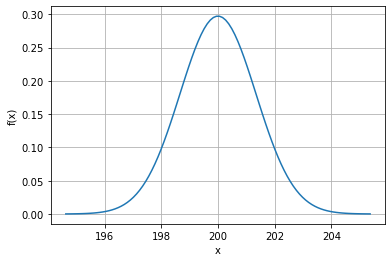

In [10]:
n = 5       # størrelsen på utvalget
mu0 = 200   # forventningsverdien til X-strek under H0
sigma = 3/np.sqrt(n)  # standardavviket til X-strk

xval = np.linspace(mu0 - 4*sigma, mu0 + 4*sigma, 100)  
fx = stats.norm.pdf(xval, mu0, sigma)                   
plt.plot(xval, fx)
plt.grid(); plt.ylabel("f(x)"); plt.xlabel("x")
plt.show()

### Steg 2: Signifikansnivå og forkastningsregel

Dersom alternativhypotesen er sann ($H_1: \mu > 200$) så vil *høye* verdier av gjennomsnittsvekt tilsi at vi skal forkaste nullhypotesen til fordel for alternativhypotesen. Vi gjør altså en *høyresidig* hypotesetest. 

Men hva er en *høy nok* gjennomsnittsvekt? Det er jo ganske mye naturlig variasjon forbundet med utvalget til Nils på fem sjokoladeplater, og Nils vil være skikkelig overbevist om at $H_1$ er sann før han går i gang med å reparere sjokolademaskinen. 

Vi velger oss et signifikansnivå $\alpha$, og deretter velger vi oss en forkastningsregel slik at sannsynligheten for å forkaste $H_0$ dersom $H_0$ er sann er lik $\alpha$. 

I standard normalfordelingen vet vi at $P(Z > z_{\alpha}) = \alpha$, og dermed er også

$$P\left( \frac{\bar{X} - 200}{3/\sqrt{5}} > \frac{z_{\alpha} - 200}{3/\sqrt{5}} \right) = \alpha$$

under antagelsen om at $\mu = 200$. Dette tilsier at vi kan forkaste $H_0$ til fordel for $H_1$ dersom vi observerer en gjennomsnittsvekt over $k = 200 + z_{\alpha}\cdot \tfrac{3}{\sqrt{5}}$.

I stedet for å se på gjennomsnittsvekt direkte, kan vi også definere testobservatoren 

$$Z = \frac{\bar{X} - 200}{3/\sqrt{5}}$$

som vil være standard normalfordelt dersom $H_0$ er sann. Da kan vi med en gang si at vi ved signifikansnivå $\alpha$ skal forkaste $H_0$ til fordel for $H_1$ dersom vi observerer $z > z_{\alpha}$. 

Fordelingen til $\bar{X}$ og $Z$ under $H_0$, og de tilhørende forkastningsområdene ved signifikansnivå $\alpha = 0.05$ er vist i figurene under. Det fargede området under grafen har areal $\alpha = 0.05$ i begge figurene. Forkastningsregelen er $\bar{x} > 202.2$ gram eller (tilsvarende) $z > 1.645$. 

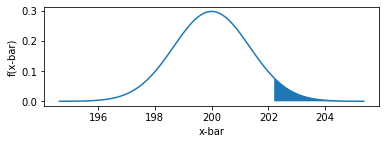

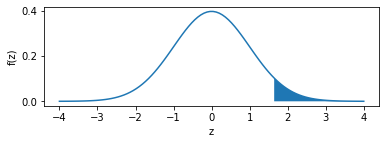

In [20]:
# Plotter kritisk verdi og areal i høyre hale 

alpha = 0.05; z_alpha = stats.norm.ppf(1 - alpha,0,1)

xval = np.linspace(mu0 - 4*sigma, mu0 + 4*sigma, 100) ; fx = stats.norm.pdf(xval, mu0, sigma)   

k = mu0 + z_alpha*sigma
section = np.linspace(k,mu0 + 4*sigma, 100, 100)

plt.subplot(2,1, 1)
plt.plot(xval, fx); plt.fill_between(section,stats.norm.pdf(section, mu0, sigma))
plt.ylabel("f(x-bar)"); plt.xlabel("x-bar")
plt.show()

zval = np.linspace(-4, 4, 100); fz = stats.norm.pdf(zval, 0, 1)
section_z = np.linspace(z_alpha,4, 100, 100)

plt.subplot(2,1, 2)
plt.plot(zval, fz); plt.fill_between(section_z,stats.norm.pdf(section_z, 0, 1))
plt.ylabel("f(z)"); plt.xlabel("z")
plt.show()

### Steg 4: Observasjoner og konklusjon

Nils har trukket tilfeldig fem sjokoladeplater og har registrert vekten til disse:

In [23]:
x = [200.8, 201.9, 202.6, 199.4, 202.3]
np.mean(x)

201.4

Gjennomsnittsvekten er på 201.4 gram, og dermed har vi ikke grunnlag for å forkaste $H_0$ ved signifikansnivå $\alpha = 0.05$. 

På samme måte kunne vi regnet ut verdien til testobservatoren $Z$:

In [25]:
z = (np.mean(x) - 200)/sigma
z

1.0434983894999061

Siden $z = 1.043$ er et lavere tall enn $z_{\alpha} = 1.645$ så forkaster vi ikke $H_0$. 

## Hvor god er hypotesetesten?

Når vi utfører hypotesetester er vi opptatt av sannsynligheten for å gjøre en type-1 feil (forkaste $H_0$ dersom $H_0$ er sann) og testens styrke (sannsynligheten for å forkaste $H_0$ dersom $H_1$ er sann). Signifikansnivået vi setter avgjør sannsynligheten for å gjøre en type-1 feil. Teststyrken er derimot avhengig av parameterverdien under $H_1$, signifikansnivået (forkastningsregelen), og størrelsen på utvalget. 

La oss se på utvalget til Nils igjen, og la oss anta at alternativhypotesen faktisk er sann, og at $\mu = 202$ gram. Hva er egentlig sjansen (teststyrken) for at Nils klarer å avdekke dette med sine $n = 5$ observasjoner?

Dersom $\mu = 202$ gram, så er $\bar{X} \sim N(202, 3/\sqrt{5})$. Nils forkaster $H_0$ til fordel for $H_1$ dersom han observerer $\bar{x} > 202.2$ gram. Hva er sjansen for at dette inntreffer nå som vi vet at  $\mu = 202$ gram?

In [29]:
n = 5
mu0 = 200 # under H0
mu = 202  # under H1
sigma = 3/np.sqrt(n)

alpha = 0.05
z_alpha = stats.norm.ppf(1 - alpha,0,1)

k = mu0 + z_alpha*sigma

1 - stats.norm.cdf(k, mu, sigma) # P(X-bar >x_alpha)

0.4387490275410151

Teststyrken er altså omtrent 0.44, så det er en $44\%$ sjanse for at Nils klarer å avdekke akkurat dette avviket fra $H_0$. Ved å justere på tallene i koden over kan du regne ut teststyrken for ulike verdier av $\mu$ under $H_1$, for ulike signifikansnivå, og for ulik størrelse på utvalget. 

Vi kan også plotte teststyrken som en funksjon av utvalgsstørrelsen $n$:

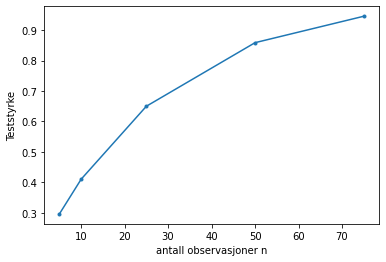

In [62]:
nverdier=nverdier=np.array([5,10,25,50,75])
mu0 = 200 # under H0
mu = 201  # under H1
sigmaverdier = 3/np.sqrt(nverdier)

alpha = 0.1
z_alpha = stats.norm.ppf(1 - alpha,0,1)

kverdier = mu0 + z_alpha*sigmaverdier

teststyrke = 1 - stats.norm.cdf(kverdier, mu, sigmaverdier)

plt.plot(nverdier, teststyrke,'.-')
plt.ylabel("Teststyrke"); plt.xlabel("antall observasjoner n")
plt.show()

In [63]:
print(nverdier)

[ 5 10 25 50 75]


In [64]:
print(teststyrke)

[0.2959117  0.41003342 0.64992393 0.85891805 0.94577508]
